In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df = df[['age', 'sibsp',	'parch', 'fare', 'survived']]
df.head()

,age,sibsp,parch,fare,survived
0,22.0,1,0,7.2500,0
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,1
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0


In [ ]:
df.isnull().sum()

age         177
sibsp         0
parch         0
fare          0
survived      0
dtype: int64

In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.isnull().sum()

age         0
sibsp       0
parch       0
fare        0
survived    0
dtype: int64

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop("survived", axis=1)
y = df["survived"]

In [ ]:
# Split the data into a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=10)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report for test set
print("\nClassification Report for Test Set:\n")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.73
Test Accuracy: 0.67

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       157
           1       0.73      0.32      0.45       111

    accuracy                           0.67       268
   macro avg       0.70      0.62      0.61       268
weighted avg       0.69      0.67      0.64       268



In [ ]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
549/891

0.6161616161616161

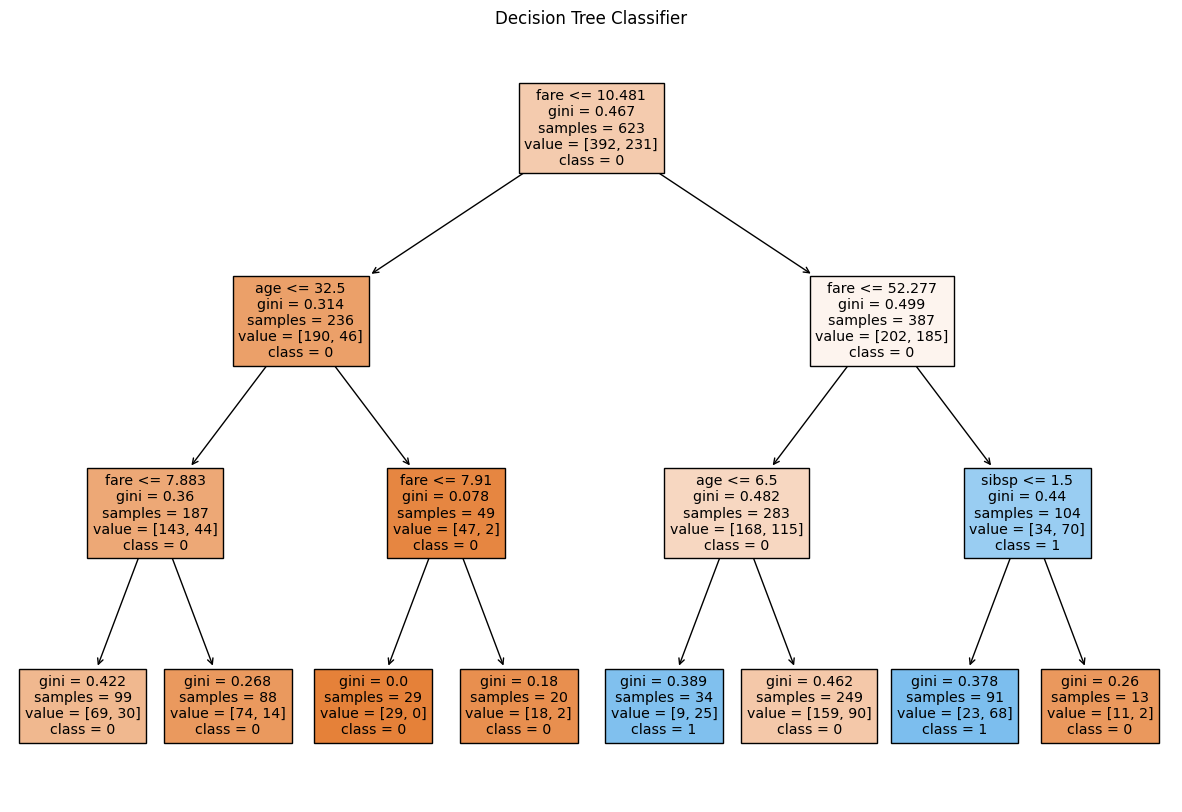

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert class names to strings (if they are not already)
class_names_str = [str(class_name) for class_name in clf.classes_]

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names_str)
plt.title("Decision Tree Classifier")
plt.show()


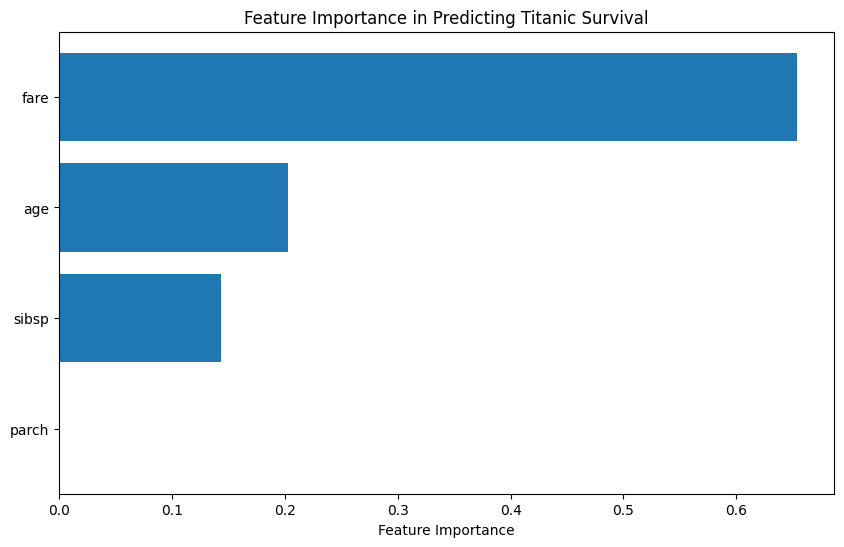

In [ ]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting Titanic Survival")
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()